In [6]:

import numpy as np
from scipy import misc
import cv2
from google.colab.patches import cv2_imshow
import math
import matplotlib.pyplot as plt

### Part 1 

Averaging and Weighted Average Filters

In [7]:
#reading the file
im = cv2.imread('kitty.bmp', cv2.IMREAD_GRAYSCALE) #reading the file

In [8]:
#this function pads the image and return the padded image
def padImage(image):
  r, c = image.shape #getting the dimensions of the image
  

  p=3;
  padding = (p-1)/2
  pad= np.zeros((r+2, c+2)); #making new array to store the padded image
  #print(pad.shape)


  for i in range(0,r,1):
    for j in range(0,c,1):
      pad[int(i+padding)][int(j+padding)]=image[i][j] #copying the pixels into new array
  
  
  return pad


Padded Image


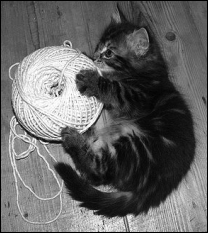

In [9]:
print("Padded Image")
paddedImage = padImage(im)
cv2_imshow(paddedImage)
#padded Image

In [10]:
#this function performs the convolution
def Convolution(image,filter):
  r, c = image.shape #getting the dimensions of the image
  out = np.zeros((r,c)) # new array to store the final results
  
  for i in range(1,r-1, 1):
    for j in range(1, c-1, 1): #nested loop to go over each pixel in the image
      result = np.zeros((9))
      t = 0
      for x in range(0,3,1): # loops to convolve filter with the image pixels
        for y in range(0,3,1):
          result[t] = image[i+x-1][j+y-1] * filter[x][y] #multiplying filter and image pixels and storing the result
          t += 1

      sumOfFilter = sum(sum(filter)) #taking sum of filter pixels
     
      out[i][j] = round(sum(result)/sumOfFilter) #dividing by sum of filter pixels
      if(out[i][j] > 255):
        out[i][j] = 255

  return out

Padded Image


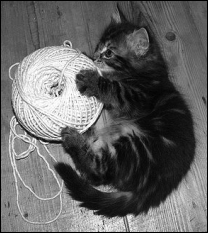



Image after applying averaging filter


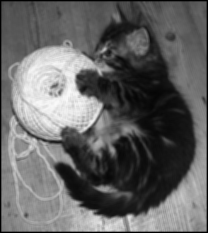

In [11]:
#using 3x3 averaging filter here
filter = np.full((3,3), 1) 
output_image = Convolution(paddedImage, filter)
print("Padded Image")
cv2_imshow(paddedImage)
print("\n\nImage after applying averaging filter")
cv2_imshow(output_image)

Padded Image


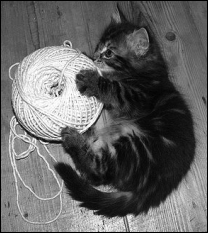



Image after applying weighted averaging filter


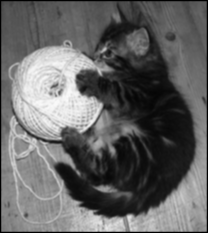

In [12]:
#using 3x3 weighted averaging filter here
filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) 
output_image = Convolution(paddedImage, filter)
print("Padded Image")
cv2_imshow(paddedImage)
print("\n\nImage after applying weighted averaging filter")
cv2_imshow(output_image)

### Part 2

Edge Strength Image

In [13]:
#this function performs the convolution but does not divide by sum of filter
def calculateEdge(image,filter):
  r, c = image.shape #getting the dimensions of the image
  out = np.zeros((r,c)) # new array to store the final results
  
  for i in range(1,r-1, 1):
    for j in range(1, c-1, 1):#nested loop to go over each pixel in the image
      result = np.zeros((9))
      t = 0
      for x in range(0,3,1):
        for y in range(0,3,1): # loops to convolve filter with the image pixels
          result[t] = image[i+x-1][j+y-1] * filter[x][y] #multiplying filter and image pixels and storing the result
          t += 1
     
      out[i][j] = sum(result) #storing the result in the out array
      if(out[i][j] > 255):
        out[i][j] = 255

  return out

image after applying horizontal filter



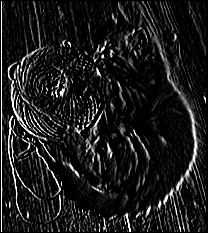

In [14]:
horizontal_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
horizontalEdgeImage = calculateEdge(paddedImage, horizontal_filter)
print("image after applying horizontal filter\n")
cv2_imshow(horizontalEdgeImage)

image after applying vertical filter



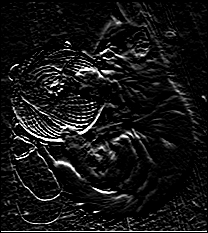

In [15]:
vertical_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
verticalEdgeImage = calculateEdge(paddedImage, vertical_filter)
print("image after applying vertical filter\n")
cv2_imshow(verticalEdgeImage)

In [16]:
def generateEdgeStrengthImage(horizontalImage, verticalImage):
  r, c = horizontalEdgeImage.shape
  out = np.zeros((r,c))

  for i in range(1,r-1, 1):
    for j in range(1, c-1, 1):
      x = (horizontalImage[i][j])**2 #taking square of pixel in image with horizontal edges
      y = (verticalImage[i][j])**2 #taking square of pixel in image with vertical edges
      out[i][j] = round(math.sqrt(x+y)) # adding x and y and taking square root and storing the result
      if(out[i][j] > 255):
        out[i][j] = 255

  return out


Edge Strength Image



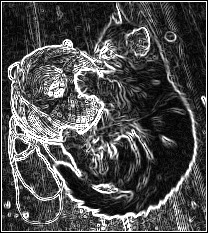

In [17]:
edgeStrengthImage = generateEdgeStrengthImage(horizontalEdgeImage, verticalEdgeImage)
print("Edge Strength Image\n")
cv2_imshow(edgeStrengthImage)


### Part 3
Thresholding

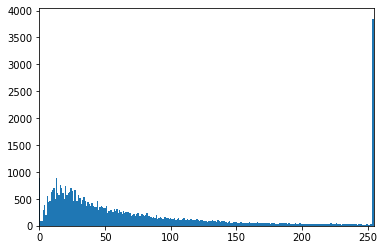

In [18]:
#plotting Histogram
hist, bin_edges = np.histogram(edgeStrengthImage, 255)
plt.bar(bin_edges[:-1], hist, width = 1)
plt.xlim(min(bin_edges), max(bin_edges))
plt.show()   


In [19]:
#this function applies threshold value on the input image
def applyThreshold(image, threshold):
  r, c = image.shape
  out = np.zeros((r,c))

  for i in range(1,r-1, 1):
    for j in range(1, c-1, 1):
      if image[i][j] >= threshold:
        out[i][j] = 255
      else:
        out[i][j] = 0

  return out

Image After applying Threshold


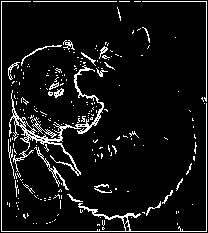

In [20]:
imageAfterThreshold = applyThreshold(edgeStrengthImage, 255)
print("Image After applying Threshold")
cv2_imshow(imageAfterThreshold)


Note: It is not possible to find a threshold value that only gives the edges of cat but not the patterns in the fur or woolen-grain

### Part 4

Image Strength Image after applying weighted average filter
 

Padded Image


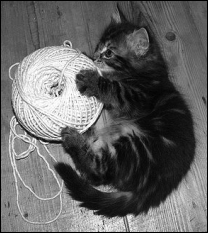

In [21]:
print("Padded Image")
paddedImage = padImage(im)
cv2_imshow(paddedImage)




Image after applying weighted averaging filter


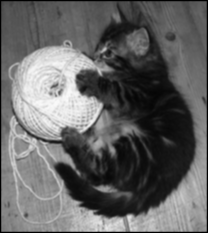

In [22]:
filter = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) 
weighted_avg_image = Convolution(paddedImage, filter)
print("\n\nImage after applying weighted averaging filter")
cv2_imshow(weighted_avg_image)

image after applying horizontal filter on the result of weighted average filter



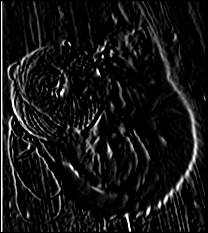

In [23]:
horizontal_filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
weightedHorizontalEdgeImage = calculateEdge(weighted_avg_image, horizontal_filter)
print("image after applying horizontal filter on the result of weighted average filter\n")
cv2_imshow(weightedHorizontalEdgeImage)

image after applying vertical filter on the result of weighted average filter



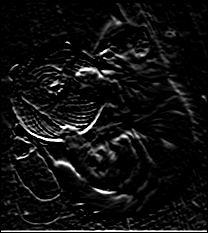

In [24]:
vertical_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
weightedVerticalEdgeImage = calculateEdge(weighted_avg_image, vertical_filter)
print("image after applying vertical filter on the result of weighted average filter\n")
cv2_imshow(weightedVerticalEdgeImage)

Edge Strength Image on new horizontal and vertical edge images



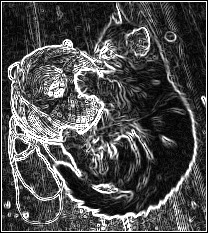

In [25]:
weightedEdgeStrengthImage = generateEdgeStrengthImage(weightedHorizontalEdgeImage, weightedVerticalEdgeImage)
print("Edge Strength Image on new horizontal and vertical edge images\n")
cv2_imshow(edgeStrengthImage)


Edge strength image calculated directly from original image after applying Threshold


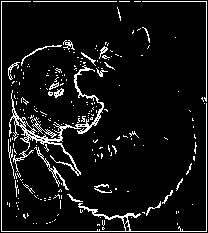

Edge Strength Image of Weighted mean image


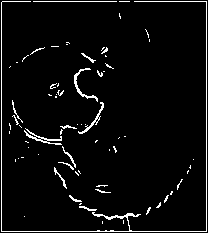

In [26]:
imageAfterThreshold = applyThreshold(edgeStrengthImage, 255)
print("Edge strength image calculated directly from original image after applying Threshold")
cv2_imshow(imageAfterThreshold)

weightedImageAfterThreshold = applyThreshold(weightedEdgeStrengthImage, 255)
print("Edge Strength Image of Weighted mean image")
cv2_imshow(weightedImageAfterThreshold)

## Note

Applying weighted averaging filter first before calculating edge strength image decreases the total number of detected edges compared to when edge strength image is calculated directly from the original image after threshold is applying
